# CHAPTER 8: CLASSIFICATION AND MODEL EVALUATION
## (Week 13: Lecture Notes)

---


## 1. INTRODUCTION: WHAT IS CLASSIFICATION?

Last week (in **Regression**), we predicted a **Numerical** value (like Price, Temperature).
This week, we are going to predict a **Categorical** label.

**The Question Type:** Not "How much?", but "Which one?"

*   Is this email **Spam** or **Not Spam**?
*   Is this tumor **Benign** or **Malignant**?
*   Will this customer **Pay the Loan** or **Default**?

**Output (y):** Usually 0 or 1 (Binary), or Class A, Class B, Class C (Multi-class).


## 2. ALGORITHM 1: K-NEAREST NEIGHBORS (K-NN)

This is the simplest, "laziest," but most intuitive algorithm in Machine Learning.

### 2.1. The Logic: "Tell me who your friends are..."
When a new data point arrives, the algorithm looks at its **K** nearest neighbors in the space. Whatever the majority is, the new data is assigned to that class.

**Analogy:** You walk into a room where you don't know anyone.
*   You look at the 5 people closest to you.
*   4 of them support **Team A**, 1 supports **Team B**.
*   **Prediction:** Your fandom class is labeled as **Team A** based on the majority decision.

### 2.2. The Importance of "K"
*   **K = 1:** It looks at only the single nearest person. (Very sensitive to noise/outliers, prone to errors).
*   **K = 100:** It looks too broadly, missing the local details.
*   **Engineering Rule:** We usually choose **Odd numbers** (3, 5, 7) for K so that we don't end up with a tie vote.

### 2.3. Distance Calculation (Euclidean)
To measure closeness, we use the Pythagorean theorem (Euclidean Distance) you remember from high school.

$$ Distance = \sqrt{(x_2-x_1)^2 + (y_2-y_1)^2} $$


## 3. ALGORITHM 2: DECISION TREES

This algorithm best mimics the human brain's decision-making process. It essentially creates a **Flowchart**.

### 3.1. The Logic: "The 20 Questions Game"
It tries to purify the data by constantly asking "Yes/No" questions.

**Example (Credit Application):**
*   **Question 1:** Is income less than 50,000?
    *   **Yes:** -> **Question 2:** Is the applicant a student?
        *   **Yes:** -> **DO NOT GIVE LOAN** (Risky)
        *   **No:** -> **GIVE LOAN**
    *   **No:** -> **GIVE LOAN**

### 3.2. Structure of the Tree
*   **Root:** The first question (The most distinguishing feature).
*   **Node:** Intermediate questions.
*   **Leaf:** The final decision (Result class).

### 3.3. Pros and Cons
*   **Pro:** You can visualize the model and answer the question "Why did you reject this?" (White Box).
*   **Con:** It is very prone to memorizing data (**Overfitting**). (We will prevent this in code by limiting depth with `max_depth`).


## 4. MODEL EVALUATION (REPORT CARD DAY)

In classification, we **do not** use RMSE (Root Mean Square Error). Because the result is a category, not a number.
Instead, we use the **Confusion Matrix**.

### 4.1. Confusion Matrix
We compare the model's predictions with reality in a 2x2 table.

| | **Predicted: POSITIVE (1)** | **Predicted: NEGATIVE (0)** |
|---|---|---|
| **Actual: POSITIVE (1)** | **TP (True Positive)** <br> *(Correct - Patient)* | **FN (False Negative)** <br> *(Missed it! - Patient but we said Healthy)* |
| **Actual: NEGATIVE (0)** | **FP (False Positive)** <br> *(False Alarm - Healthy but we said Patient)* | **TN (True Negative)** <br> *(Correct - Healthy)* |

*   **FP (Type 1 Error):** False Alarm (No fire, but alarm rang).
*   **FN (Type 2 Error):** Missed Detection (Fire exists, alarm silent). **(The Most Dangerous One!)**

### 4.2. Success Metrics
*   **Accuracy:** General success.
    *   Formula: $(TP + TN) / Total$
    *   **The Trap:** If 99 out of 100 patients are healthy, and the model calls everyone "Healthy", it looks 99% successful. This is why accuracy alone isn't enough.
*   **Precision:** "Of the ones I called positive, how many are actually positive?" (Avoiding false alarms).
*   **Recall (Sensitivity):** "How many of the actual patients did I manage to catch?" (Not missing anyone).
*   **F1-Score:** The balance between Precision and Recall.

$$ F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall} $$


## 5. APPLICATION: BREAST CANCER DIAGNOSIS (Scikit-Learn)

**Scenario:** "A Real Life-Saving Simulation".
**Data:** `load_breast_cancer` inside Scikit-learn (Tumor radius, texture, etc.).
**Target:** 0 (Malignant/Bad) or 1 (Benign/Good).

### Step 1: Load and Split Data


In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load Data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Split into Train and Test (20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 2: Build K-NN Model (Scaling is a Must!)

Since K-NN measures distance, large numbers will dominate small numbers. We **must** use `StandardScaler`.


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Scale the Data (Standardize)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Model (Let's set K=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make Predictions
y_pred_knn = knn_model.predict(X_test_scaled)


### Step 3: Build Decision Tree Model (And Visualize)

We put a limit on `max_depth` for the decision tree to prevent it from memorizing the data.


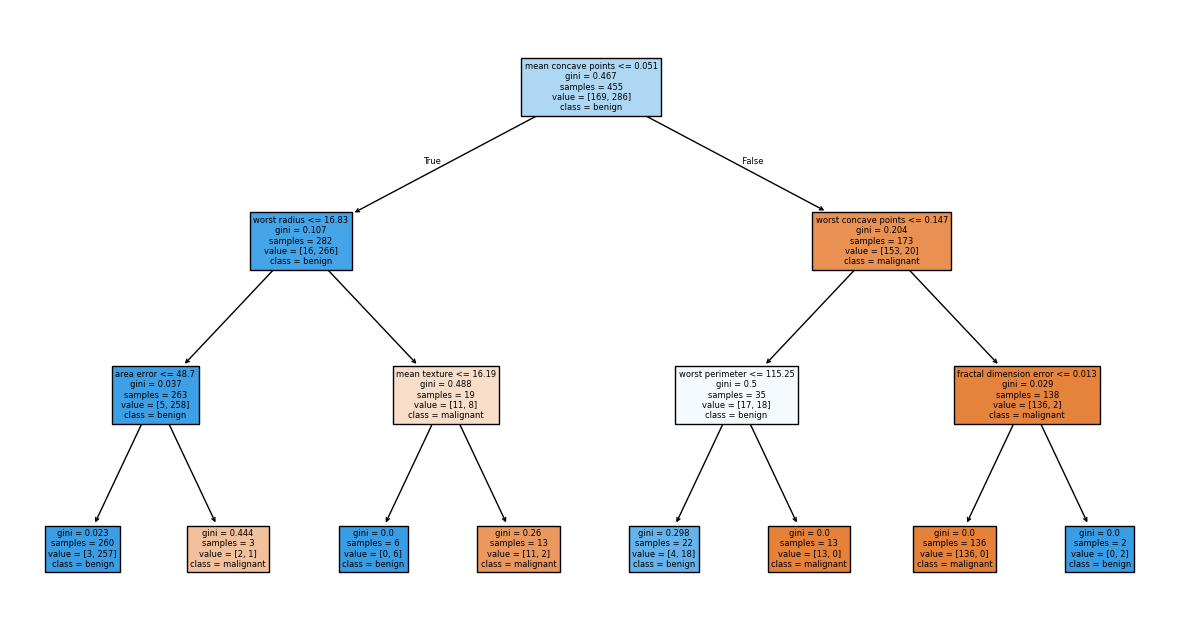

In [3]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Train Model (max_depth=3 to prevent overfitting/memorization)
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

# Make Predictions
y_pred_tree = tree_model.predict(X_test)

# Visualize the Tree (Students love this part!)
plt.figure(figsize=(15,8))
plot_tree(tree_model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()


### Step 4: Evaluation (The Report Card)


In [4]:
from sklearn.metrics import confusion_matrix, classification_report

print("--- K-NN RESULTS ---")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

print("\n--- DECISION TREE RESULTS ---")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


--- K-NN RESULTS ---
[[40  3]
 [ 3 68]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114


--- DECISION TREE RESULTS ---
[[39  4]
 [ 2 69]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



#### **In-Class Discussion Question:**
In a medical test, which is more important: Not giving a False Alarm (**Precision**), or Not Missing a Patient (**Recall**)?

*   **Analysis:** In medicine, **Recall** is generally more important. It is better to have a false alarm (further testing) than to send a sick patient home.


## 7. WEEKLY HOMEWORK (Challenge)

**Task:** Use the "Social Network Ads" dataset.
*(Note: Do not prefer the Titanic dataset for this homework; it contains too much text/string data requiring encoding. Social Network Ads is numerical and more suitable.)*

1.  Load the data (Purchased Car status based on Age and Salary).
2.  Split the data into Training/Test.
3.  Apply the **K-NN algorithm** (You must use `StandardScaler`!).
4.  Compare **Accuracy** scores for different K values (K=1, K=5, K=50). Which K is the best?
5.  Interpret the model's **Confusion Matrix**.
